#AirBnB 2019 dataset.  I will perform to data science projects to see if i can predict the prices and the number of reviews

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in dataset
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
#check the head of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#what is the size of the dataset
df.shape

(48895, 16)

In [5]:
#what are the column names in the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
#null values in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#stats on the datset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


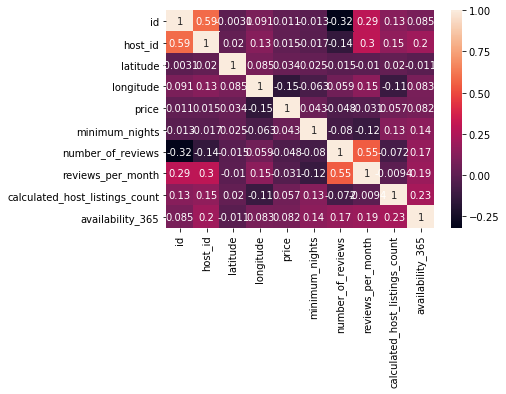

In [9]:
#heatmap to show correlation between different coluMn
sns.heatmap(df.corr(),annot=True)

In [10]:
#get rid of columns which are of no use and have null values
df.drop(['id','host_name','last_review'], axis = 1,inplace=True)

In [11]:
#fill the null values in the name column
df.reviews_per_month.fillna(value=0,inplace=True)
df.name.fillna("NoName", inplace=True)

# Exploratory data analysis

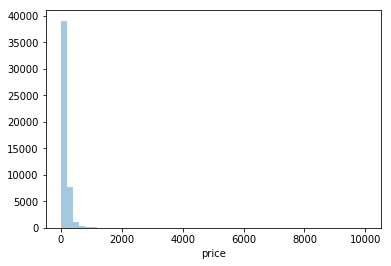

In [12]:
#show the distribution of prices charged for properties on airbnb
sns.distplot(df['price'],kde=False)

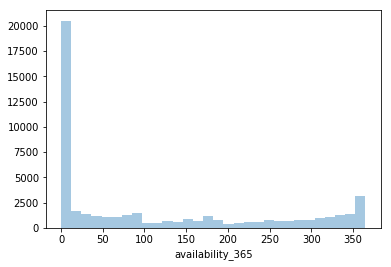

In [13]:
#distribution of listing availability throughout the dataset
sns.distplot(df['availability_365'],kde=False)

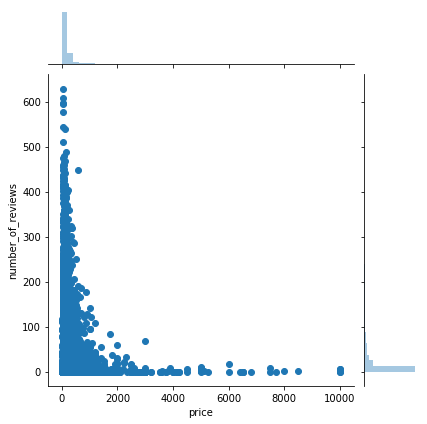

In [14]:
#show the minumum number of nights needed to be booked
sns.jointplot(x='price',y='number_of_reviews',data=df,kind='scatter')

Text(0, 0.5, 'Count')

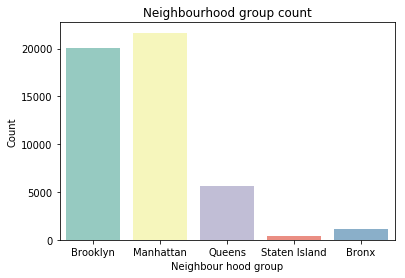

In [15]:
ax = sns.countplot(x = "neighbourhood_group", data = df, palette = "Set3")
ax.set_title("Neighbourhood group count")
ax.set_xlabel("Neighbour hood group")
ax.set_ylabel("Count")

In [16]:
df.groupby(['neighbourhood_group']). agg({'price':'sum'})

,price
neighbourhood_group,
Bronx,95459
Brooklyn,2500600
Manhattan,4264527
Queens,563867
Staten Island,42825


In [17]:
df.groupby(['neighbourhood']). agg({'price':'sum'})

,price
neighbourhood,
Allerton,3679
Arden Heights,269
Arrochar,2415
Arverne,13227
Astoria,105469
Bath Beach,1390
Battery Park City,25729
Bay Ridge,20365
Bay Terrace,852


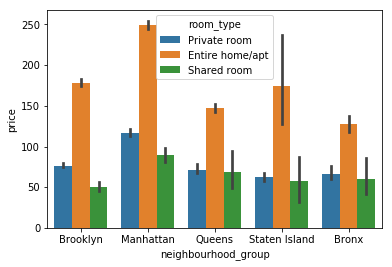

In [18]:
sns.barplot(x='neighbourhood_group',y='price',data=df,hue='room_type')


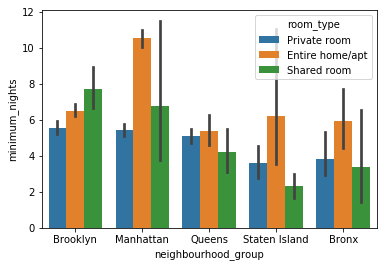

In [19]:
sns.barplot(x='neighbourhood_group',y='minimum_nights',data=df,hue='room_type')

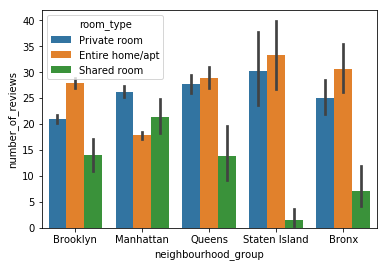

In [20]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=df,hue='room_type')

In [21]:
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].sum()

In [22]:
df1.nlargest

<bound method Series.nlargest of room_type        neighbourhood_group
Entire home/apt  Bronx                    48325
                 Brooklyn               1704633
                 Manhattan              3289707
                 Queens                  308218
                 Staten Island            30597
Private room     Bronx                    43546
                 Brooklyn                775099
                 Manhattan               932111
                 Queens                  241983
                 Staten Island            11711
Shared room      Bronx                     3588
                 Brooklyn                 20868
                 Manhattan                42709
                 Queens                   13666
                 Staten Island              517
Name: price, dtype: int64>

In [23]:
df2 = df.groupby(['room_type','neighbourhood_group'])['reviews_per_month'].sum()

In [24]:
df2.nlargest

<bound method Series.nlargest of room_type        neighbourhood_group
Entire home/apt  Bronx                    691.58
                 Brooklyn               10757.13
                 Manhattan              11378.43
                 Queens                  3427.04
                 Staten Island            311.16
Private room     Bronx                    860.23
                 Brooklyn               10037.27
                 Manhattan               9141.42
                 Queens                  5220.53
                 Staten Island            270.17
Shared room      Bronx                     58.13
                 Brooklyn                 310.58
                 Manhattan                638.23
                 Queens                   231.48
                 Staten Island              6.66
Name: reviews_per_month, dtype: float64>

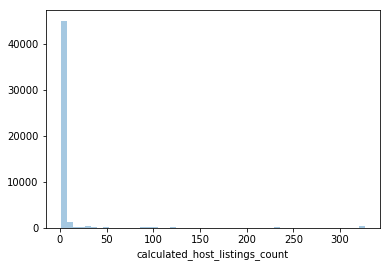

In [25]:
sns.distplot(df['calculated_host_listings_count'],kde=False)

# Data Science - Predicting Price


In [26]:
df = pd.read_csv('AB_NYC_2019.csv')

In [27]:
categorical_vars = ['neighbourhood_group', 'neighbourhood', 'room_type']
numeric_vars = ['host_id', 'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
target_var = 'price'


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
#encode the object variables
lb = LabelEncoder()
df['neighbourhood_group'] = lb.fit_transform(df['neighbourhood_group'])
df['room_type'] = lb.fit_transform(df['room_type'])
df['neighbourhood'] = lb.fit_transform(df['neighbourhood'])


In [31]:
df = df.drop(['name','host_id','host_name','id','latitude','longitude','reviews_per_month','last_review'],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
neighbourhood_group               48895 non-null int64
neighbourhood                     48895 non-null int64
room_type                         48895 non-null int64
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: int64(8)
memory usage: 3.0 MB


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop("price",axis=1)
y = df['price']

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,accuracy_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #split the dataset


In [36]:
dtr = DecisionTreeRegressor()

In [37]:
dtr.fit(X_train,y_train)
d_predict= dtr.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test,d_predict))

304.3568892322946

In [39]:
#import more ensemble methods to try.  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgboost

In [40]:

rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()

In [41]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [42]:
rfc.feature_importances_

array([0.03059314, 0.27004053, 0.07522908, 0.19062188, 0.12582677,
       0.11339278, 0.19429584])

In [43]:

feature_importances = pd.Series(rfc.feature_importances_,X.columns[::])
print(feature_importances)

neighbourhood_group               0.030593
neighbourhood                     0.270041
room_type                         0.075229
minimum_nights                    0.190622
number_of_reviews                 0.125827
calculated_host_listings_count    0.113393
availability_365                  0.194296
dtype: float64


In [44]:
newfi = feature_importances.sort_values(ascending=False)

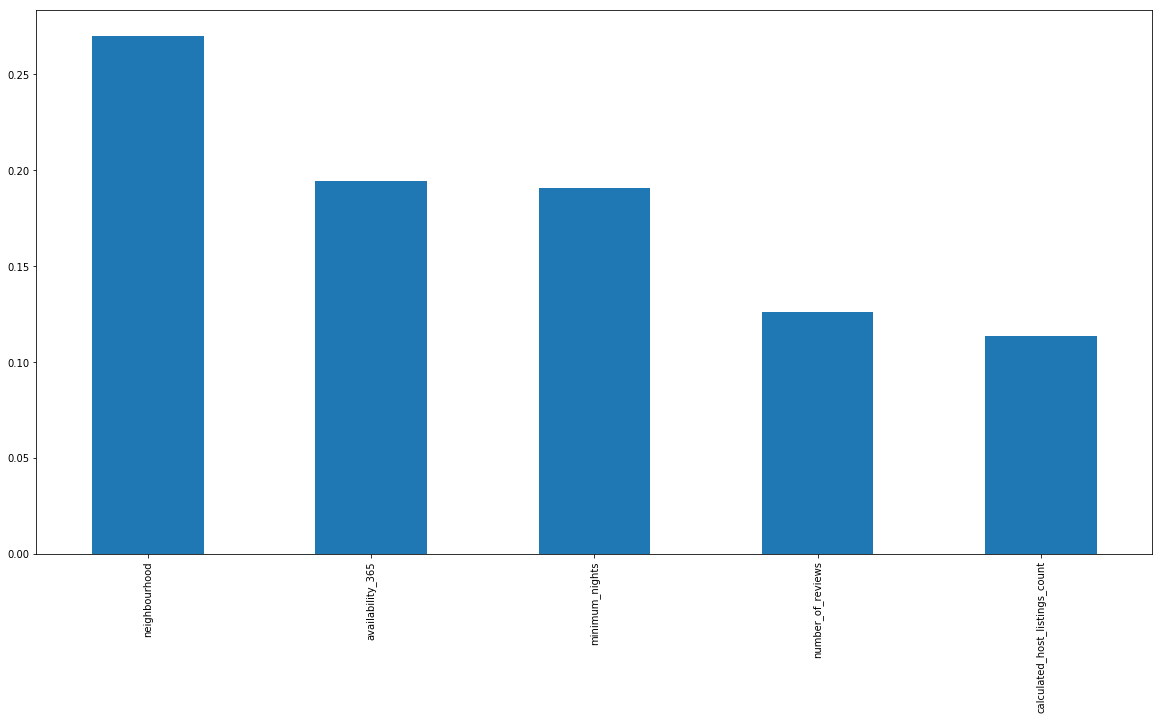

In [45]:
newfi[0:5].plot.bar(figsize=(20,10)) 
plt.show()

In [46]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [47]:
#check the RMSE for all the models
print("RMSE score for Decision tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ",np.sqrt(mean_squared_error(y_test,g_predict)))

RMSE score for Decision tree :  304.3568892322946
RMSE score for Random_Forest :  243.44489976381067
RMSE score for Gradient Boosting :  231.95949068711914


    #DATA SCIENCE PREDICTING Number of REVIEWS


In [48]:
df = pd.read_csv('AB_NYC_2019.csv')

In [49]:
#organise the features into categorical features and numerical features
categorical_vars = ['neighbourhood_group', 'neighbourhood', 'room_type']
numeric_vars = ['host_id', 'minimum_nights','calculated_host_listings_count','availability_365']
target_var = 'number_of_reviews'


In [50]:
#seperate the x and y
from sklearn.model_selection import train_test_split
X = df.drop("number_of_reviews",axis=1)
y = df['number_of_reviews']

In [51]:
#encode our object variables
lb = LabelEncoder()
df['neighbourhood_group'] = lb.fit_transform(df['neighbourhood_group'])
df['room_type'] = lb.fit_transform(df['room_type'])
df['neighbourhood'] = lb.fit_transform(df['neighbourhood'])


In [52]:
df = df.drop(['name','host_id','host_name','id','latitude','longitude','reviews_per_month','last_review'],axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #split the dataset


In [55]:
dtr = DecisionTreeRegressor()

In [56]:
dtr.fit(X_train,y_train)
d_predict= dtr.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test,d_predict))

55.085104971909246

In [58]:
rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()

In [59]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [60]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [61]:
#check the RMSE for all the models
print("RMSE score for Decision tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ",np.sqrt(mean_squared_error(y_test,g_predict)))

RMSE score for Decision tree :  55.085104971909246
RMSE score for Random_Forest :  39.74818992263722
RMSE score for Gradient Boosting :  39.64463484983321


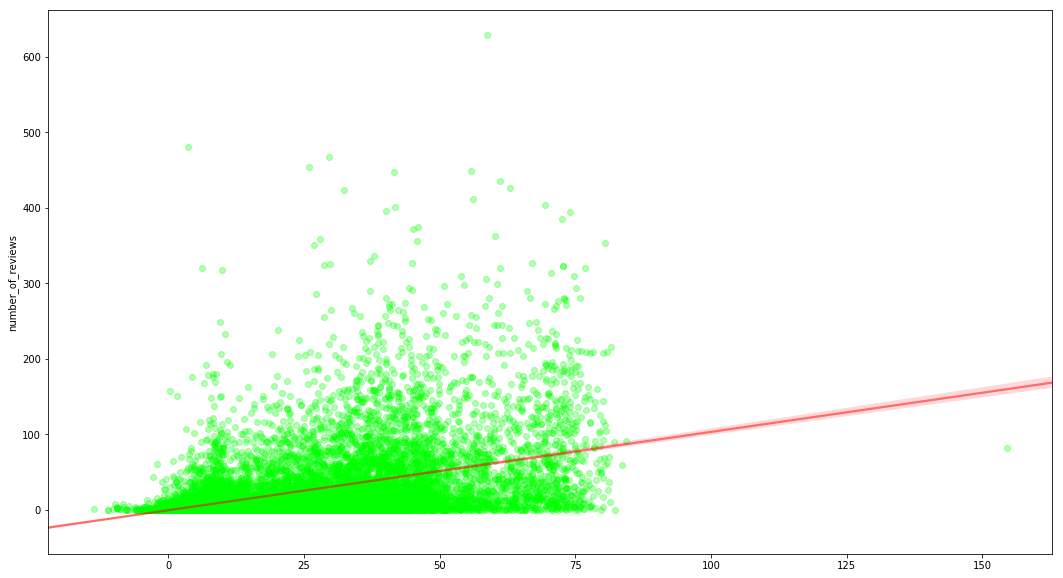

In [63]:
plt.figure(figsize=(18,10))
sns.regplot(g_predict,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})